# Importing Libraries

In [1]:
import numpy as np
import random
import os
import shutil
cwd = os.getcwd() #To get the current working directory
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  #optional


# Count number of positive files

In [2]:
no_of_positive = os.listdir("../input/surface-crack-detection/Positive")
print(len(no_of_positive)) #print no of postive images     

20000


#  Image with cracks

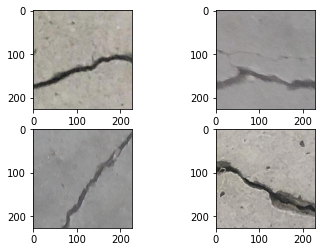

In [3]:
random_indices = np.random.randint(0, len(no_of_positive), size=4) # size=4 specifies the no.of indexes
#print(random_indices) - prints the index listprint("******Random Images with Cracks*********")
random_images = np.array(no_of_positive)[random_indices.astype(int)]
# Storing image paths in the list with random_index index

f,axarr = plt.subplots(2,2)  #Used to place images side to side with 2 rows and 2 cols
axarr[0,0].imshow(plt.imread(os.path.join(cwd, '../input/surface-crack-detection/Positive', random_images[0])))
axarr[0,1].imshow(plt.imread(os.path.join(cwd, '../input/surface-crack-detection/Positive', random_images[1])))
axarr[1,0].imshow(plt.imread(os.path.join(cwd, '../input/surface-crack-detection/Positive', random_images[2])))
axarr[1,1].imshow(plt.imread(os.path.join(cwd, '../input/surface-crack-detection/Positive', random_images[3])))

#plt.imread() - used to convert file to array
#axrr[index,index] - used to place the img at the particular position
#os.path.join() - used to join the sub paths together

# Count number of negative files

In [4]:
no_of_negative = os.listdir("../input/surface-crack-detection/Negative")
print(len(no_of_negative)) #print no of files

20000


# Images without cracks

*****************Random Images without Cracks**************************


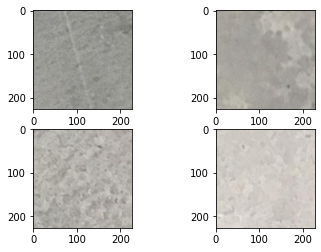

In [5]:
## Visualize Random images with no cracks
random_indices = np.random.randint(0, len(no_of_negative), size=4)
print("*****************Random Images without Cracks**************************")
random_images = np.array(no_of_negative)[random_indices.astype(int)]

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(mpimg.imread(os.path.join(cwd, '../input/surface-crack-detection/Negative', random_images[0])))
axarr[0,1].imshow(mpimg.imread(os.path.join(cwd, '../input/surface-crack-detection/Negative', random_images[1])))
axarr[1,0].imshow(mpimg.imread(os.path.join(cwd, '../input/surface-crack-detection/Negative', random_images[2])))
axarr[1,1].imshow(mpimg.imread(os.path.join(cwd, '../input/surface-crack-detection/Negative', random_images[3])))

# spliting datasets into traning and testing

In [6]:
!pip install tensorflow

ERROR: Could not find a version that satisfies the requirement six~=1.15.0 (from tensorflow) (from versions: none)
ERROR: No matching distribution found for six~=1.15.0


In [7]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from pathlib import Path

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
data_dir = Path("../input/surface-crack-detection")

batch_size = 64
img_width = 200
img_height = 200

# Training

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory( data_dir,
  validation_split=0.2,
  subset="training",
  seed=246,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 40000 files belonging to 2 classes.
Using 32000 files for training.



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

# Testing

In [9]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=246,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 40000 files belonging to 2 classes.
Using 8000 files for validation.


In [10]:
class_names = train_ds.class_names
print("Classifications:", class_names) 

Classifications: ['Negative', 'Positive']


# Displaying datasets

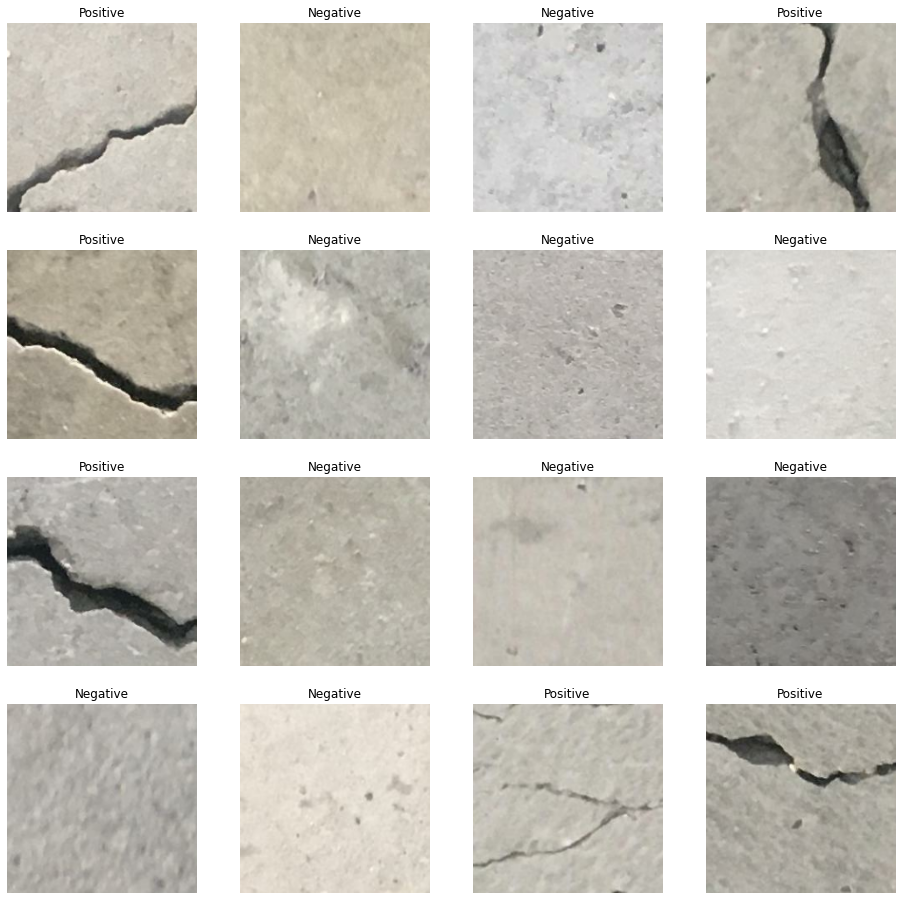

In [11]:
plt.figure(figsize=(16, 16))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")